In [345]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [346]:
df = pd.read_csv("diabetes.csv")

In [347]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [348]:
# By default top 5 rows will be displayed

In [253]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [254]:
# by default bottom 5rows will be displayed

In [255]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [256]:
df.columns #learning about the columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [257]:
df.shape

(768, 9)

In [258]:
# there are 768 rows and 9 columns in the dataset

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [260]:
# there are 768 non null values in data

In [261]:
# summary statistics of numerical column
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [262]:
# here we see that min value of glucose, BP, SkinThickness, Insulin, BMI is zero which is practically not possible
# Hence in data cleaning, we have to replace them with median/mean value depending on the distribution
# Also in the max column we can see insulin levels are 846, hence we have to treat outliers
# Mean of age is 33.24
# lower quartile Q1 for bmi is 27.30 and upper quartile is 36.60

In [263]:
df.isnull().sum() # checking for null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [264]:
# There are no null values in data

In [265]:
df["BMI"]

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [351]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [266]:
#checking for 0 values in 5 columns , Age and  DiabetesPedigreeFunction do not have have minimum value as 0 hence we need not replace any values
#number of pregnancies as 0 is possible as observed in df.describe
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


In [267]:
# This shows the count of zero in our columns

In [268]:
# Data Visualisation

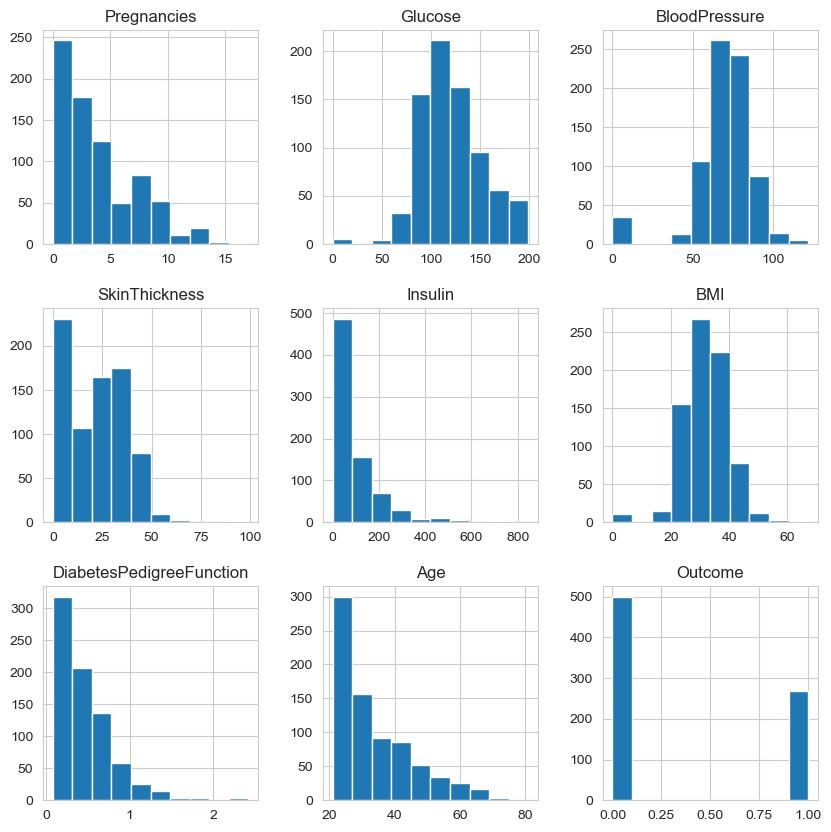

In [269]:
#histogram for each  feature
df.hist(bins=10,figsize=(10,10))
plt.show()


In [270]:
# We see that Glucose and Blood Pressure are normally distributed rest others are skewed and have outliers

<Axes: xlabel='DiabetesPedigreeFunction'>

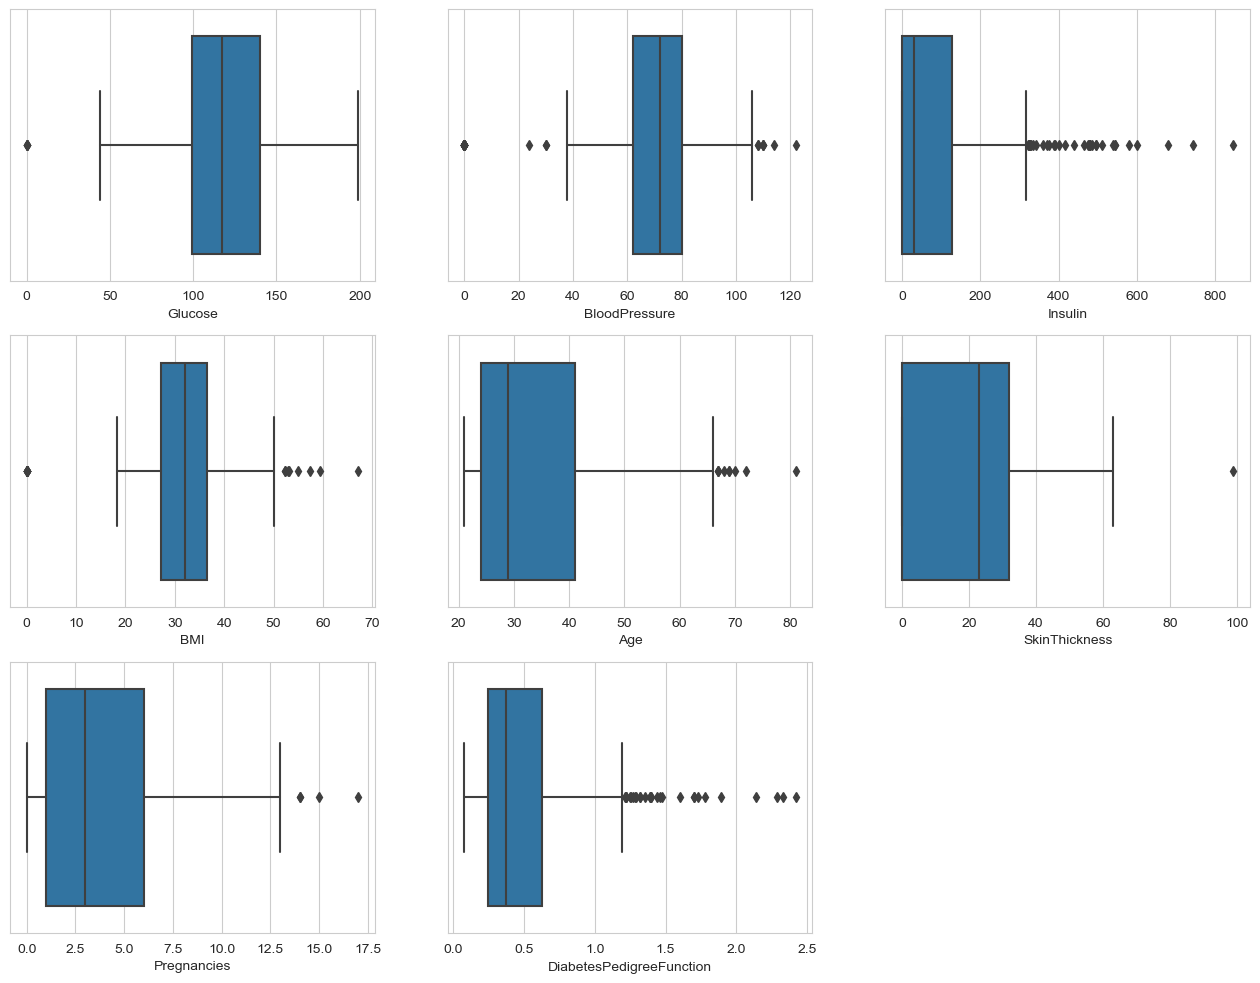

In [271]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

In [272]:
# We see that there are outliers in Blood pressure, BMI, Age, Pregnancies
# There are alot of outliers in Insulin and DiabetesPedigreeFunction

<Axes: xlabel='Outcome', ylabel='count'>

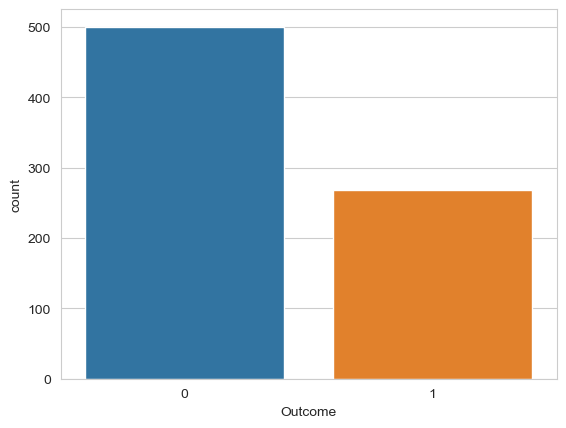

In [273]:
sns.countplot(x='Outcome', data=df)

In [274]:
# Here we see that the number of people having diabetes are less than that of people who doesn't ahve diabetes

In [275]:
df.shape

(768, 9)

In [276]:
#replacing 0 values with mean values if data is normally distributed and with median values if its a skewed distribution 
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

<Axes: >

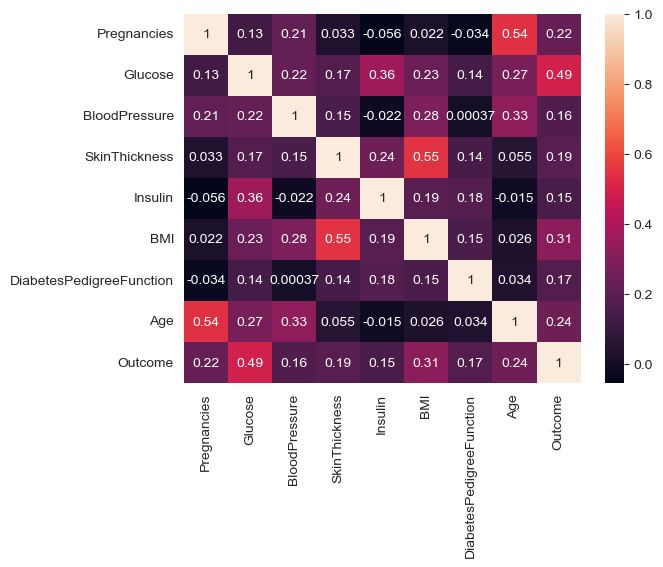

In [277]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

In [278]:
# We can observe that Glucose, BMI and Age are the most correlated with Outcome.
# BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated


### Data Preprocessing

In [279]:
# Treating Outliers

In [280]:
# outlier filter

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [281]:
lower_bound

Pregnancies                  -6.500
Glucose                      39.000
BloodPressure                40.000
SkinThickness                 9.500
Insulin                    -114.625
BMI                          13.850
DiabetesPedigreeFunction     -0.330
Age                          -1.500
Outcome                      -1.500
dtype: float64

In [282]:
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [283]:
df.shape

(636, 9)

In [284]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [285]:
upper_bound

Pregnancies                  13.50000
Glucose                     189.00000
BloodPressure                99.00000
SkinThickness                43.00000
Insulin                     216.75000
BMI                          47.76250
DiabetesPedigreeFunction      1.09575
Age                          61.50000
Outcome                       2.50000
dtype: float64

In [286]:
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [287]:
df.shape

(568, 9)

<Axes: xlabel='DiabetesPedigreeFunction'>

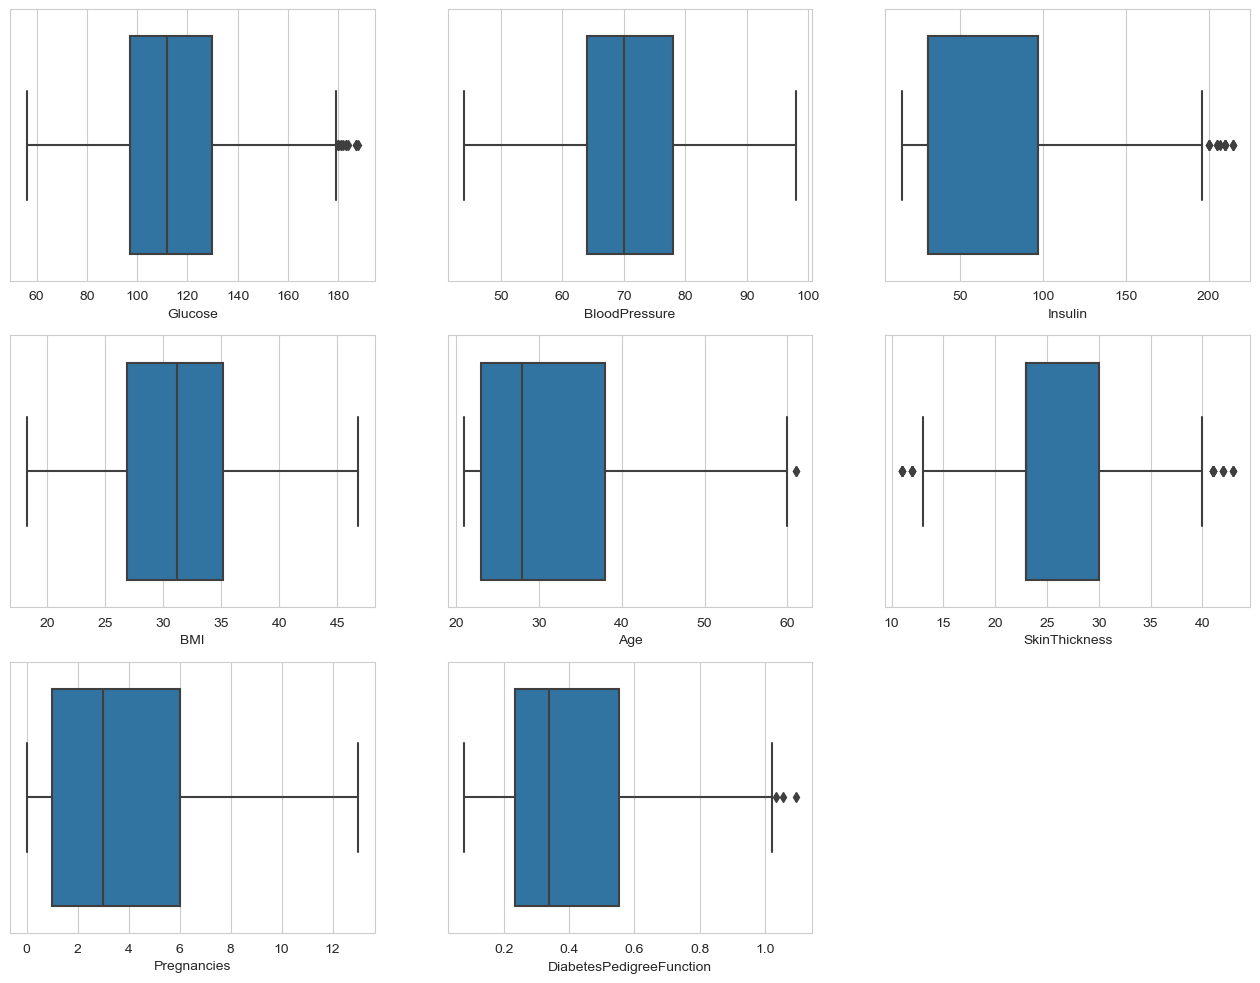

In [288]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

In [289]:
#Outliers are removed to some extent

In [290]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [291]:
lower_bound

Pregnancies                 -6.50000
Glucose                     47.50000
BloodPressure               43.00000
SkinThickness               12.50000
Insulin                    -69.25000
BMI                         14.50000
DiabetesPedigreeFunction    -0.24075
Age                          0.50000
Outcome                     -1.50000
dtype: float64

In [292]:
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [293]:
upper_bound

Pregnancies                  13.50000
Glucose                     179.50000
BloodPressure                99.00000
SkinThickness                40.50000
Insulin                     196.75000
BMI                          47.50000
DiabetesPedigreeFunction      1.02725
Age                          60.50000
Outcome                       2.50000
dtype: float64

In [294]:
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

<Axes: xlabel='DiabetesPedigreeFunction'>

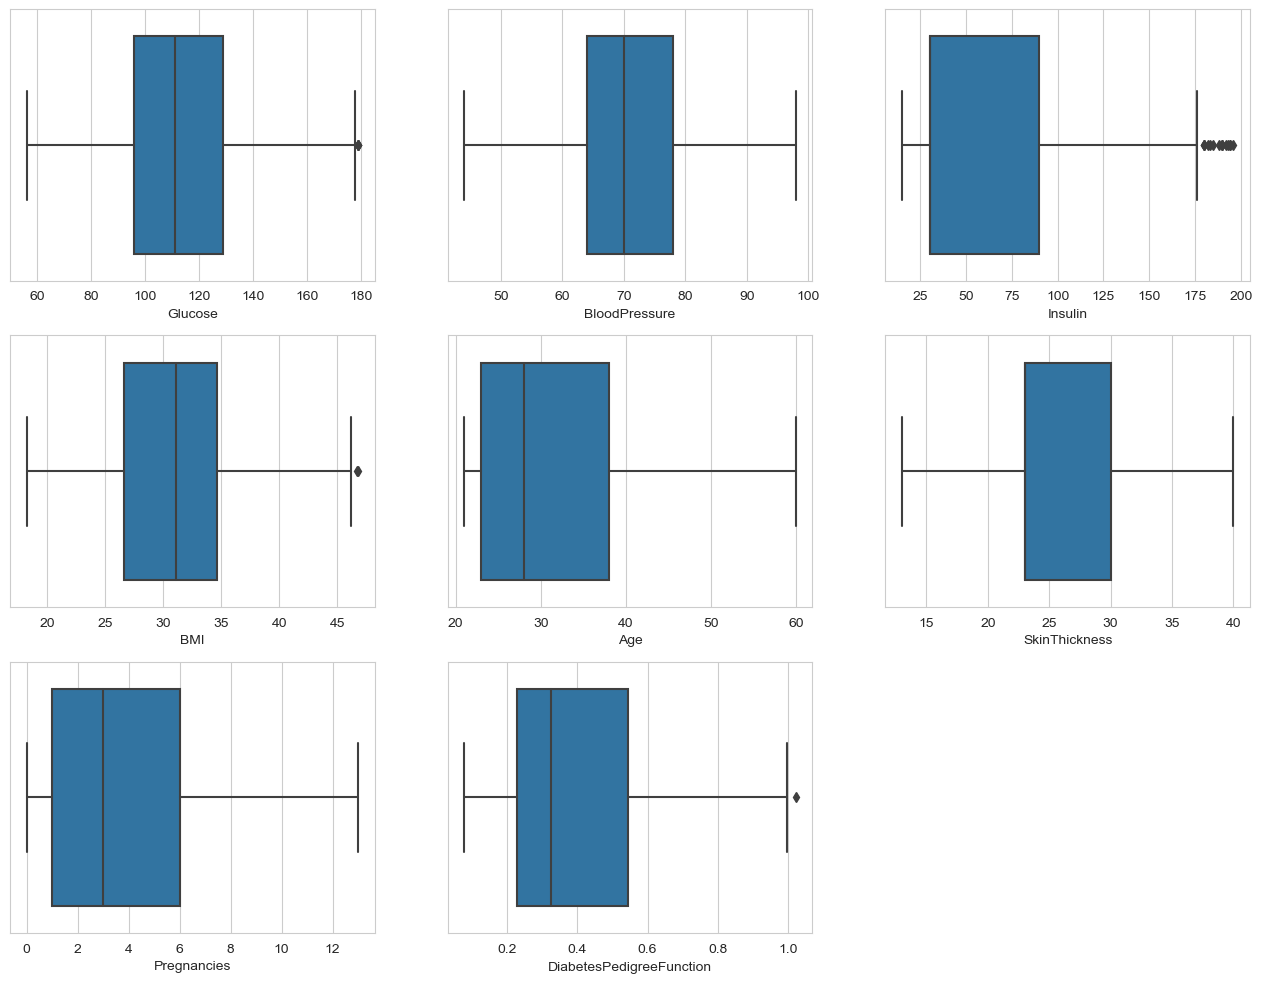

In [295]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

In [296]:
# splitiing the dataframe in X and y

X = df.drop("Outcome", axis=1)
y = df.Outcome 


In [297]:
X_num = X.select_dtypes('number')
X_num.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,30.5,33.6,0.627,50
1,1,85.0,66.0,29,30.5,26.6,0.351,31
3,1,89.0,66.0,23,94.0,28.1,0.167,21
5,5,116.0,74.0,23,30.5,25.6,0.201,30
6,3,78.0,50.0,32,88.0,31.0,0.248,26


In [298]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [299]:
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [300]:
#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_num_scaled, y, test_size=0.2, random_state=0)

In [301]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(410, 8)
(103, 8)
(410,)
(103,)


In [302]:
#  Observations after preprocessing
# - Rows with missing values are replaced with mean/median
# - Independent and dependent features have been separated into X and y.
# Outliers are been treated
# - The dataset has been split into train and test sets for model evaluation.

# KNN Classification

In [362]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [366]:
param_grid = {'n_neighbors': np.arange(1, 20), 'weights': ['uniform','distance']}
knn = KNeighborsClassifier()
# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Predict on the test set with the best model
y_pred = grid_search.predict(X_train)
y_pred1 = grid_search.predict(X_test)

Best Parameters:  {'n_neighbors': 13, 'weights': 'uniform'}
Best Accuracy:  0.7512195121951221


In [369]:
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_train,y_pred))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print("\n F1:\n",f1_score(y_test,y_pred1))
print("\n Precision score is:\n",precision_score(y_test,y_pred1))
print("\n Recall score is:\n",recall_score(y_train,y_pred))

print("\n Recall score is:\n",recall_score(y_test,y_pred1))


[[69  4]
 [18 12]]
0.802439024390244
0.7864077669902912
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        73
           1       0.75      0.40      0.52        30

    accuracy                           0.79       103
   macro avg       0.77      0.67      0.69       103
weighted avg       0.78      0.79      0.76       103


 F1:
 0.5217391304347827

 Precision score is:
 0.75

 Recall score is:
 0.41964285714285715

 Recall score is:
 0.4


## Predicting Probabilities

In [28]:
y_train_probs = model.predict_proba(X_train)[:, 1]
y_test_probs = model.predict_proba(X_test)[:, 1]
print(y_train_probs)
print("   ")
print("y_test_probs",y_test_probs)

[0.75303475 0.13165178 0.70214257 0.1389773  0.55785996 0.96654137
 0.64599139 0.76835455 0.02189208 0.26662264 0.87089947 0.36148188
 0.20396451 0.13005264 0.2761547  0.10314701 0.12633665 0.20494451
 0.19419254 0.25882689 0.51932027 0.13091826 0.38345838 0.10429122
 0.12033998 0.07239044 0.15813659 0.83857633 0.14850158 0.95363288
 0.52949203 0.02532458 0.71954753 0.2649984  0.43408945 0.1295976
 0.18332161 0.09069344 0.08443701 0.233219   0.09817226 0.7701333
 0.75340202 0.47641458 0.06747123 0.3057663  0.06854481 0.12842408
 0.15439153 0.40958001 0.2526059  0.15490113 0.24282045 0.20135955
 0.37579433 0.11613534 0.11678723 0.08275116 0.31815678 0.31378818
 0.21053626 0.34992693 0.43189294 0.31411405 0.49244693 0.21554053
 0.13832887 0.04737077 0.46980528 0.64597627 0.61734494 0.72033568
 0.2278139  0.23553281 0.05418273 0.18979    0.41338204 0.60098349
 0.02987899 0.35881748 0.76131466 0.36495337 0.16862719 0.8822345
 0.14775459 0.93076081 0.33085463 0.59890099 0.19576319 0.2250413

### Consider different thresholds and calculate confusion matrices

In [29]:

thresholds = np.arange(0, 1.1, 0.1)
for threshold in thresholds:
    y_train_pred = (y_train_probs > threshold).astype(int)
    y_test_pred = (y_test_probs > threshold).astype(int)

    confusion_train = confusion_matrix(y_train, y_train_pred)
    confusion_test = confusion_matrix(y_test, y_test_pred)

    print(f"Threshold: {threshold}")
    print("Confusion Matrix (Train Set):")
    print(confusion_train)
    print("Confusion Matrix (Test Set):")
    print(confusion_test)
    print("\n")


Threshold: 0.0
Confusion Matrix (Train Set):
[[  0 393]
 [  0 221]]
Confusion Matrix (Test Set):
[[  0 107]
 [  0  47]]


Threshold: 0.1
Confusion Matrix (Train Set):
[[ 94 299]
 [  4 217]]
Confusion Matrix (Test Set):
[[27 80]
 [ 1 46]]


Threshold: 0.2
Confusion Matrix (Train Set):
[[205 188]
 [ 19 202]]
Confusion Matrix (Test Set):
[[56 51]
 [ 2 45]]


Threshold: 0.30000000000000004
Confusion Matrix (Train Set):
[[273 120]
 [ 46 175]]
Confusion Matrix (Test Set):
[[74 33]
 [ 6 41]]


Threshold: 0.4
Confusion Matrix (Train Set):
[[317  76]
 [ 72 149]]
Confusion Matrix (Test Set):
[[89 18]
 [15 32]]


Threshold: 0.5
Confusion Matrix (Train Set):
[[345  48]
 [ 92 129]]
Confusion Matrix (Test Set):
[[98  9]
 [18 29]]


Threshold: 0.6000000000000001
Confusion Matrix (Train Set):
[[358  35]
 [113 108]]
Confusion Matrix (Test Set):
[[100   7]
 [ 22  25]]


Threshold: 0.7000000000000001
Confusion Matrix (Train Set):
[[375  18]
 [140  81]]
Confusion Matrix (Test Set):
[[104   3]
 [ 28  19]]


### Decision Tree Classification

In [305]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


In [306]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [307]:
clfpred1 = clf.predict(X_train)
clfpred1

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [308]:
# predicting the results for test data
clfpred = clf.predict(X_test)
clfpred

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [309]:
print(confusion_matrix(y_test,clfpred))
print(accuracy_score(y_train,clfpred1))
print(accuracy_score(y_test,clfpred))
print(classification_report(y_test,clfpred))
print("\n F1:\n",f1_score(y_test,clfpred))
print("\n Precision score is:\n",precision_score(y_test,clfpred))
print("\n Recall score is:\n",recall_score(y_test,clfpred))


[[56 17]
 [13 17]]
1.0
0.7087378640776699
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        73
           1       0.50      0.57      0.53        30

    accuracy                           0.71       103
   macro avg       0.66      0.67      0.66       103
weighted avg       0.72      0.71      0.71       103


 F1:
 0.53125

 Precision score is:
 0.5

 Recall score is:
 0.5666666666666667


In [310]:
dt_classifier = DecisionTreeClassifier()

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 10),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 5)
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy Score: 0.7585365853658536
Accuracy on Test Set: 0.7572815533980582


### Logistic regression

In [323]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

In [324]:
reg = LogisticRegression()
reg.fit(X_train,y_train) 

LogisticRegression()

In [333]:
lr_pred=reg.predict(X_train)
lr_pred1=reg.predict(X_test)

In [335]:
lr_pred1.shape

(103,)

In [337]:
y_test.shape

(103,)

In [341]:
print("Classification Report is:\n",classification_report(y_test,lr_pred1))
print("\n F1:\n",f1_score(y_test,lr_pred1))
print("\n Precision score is:\n",precision_score(y_test,lr_pred1))
print("\n Recall score is:\n",recall_score(y_test,lr_pred1))
print("\n Accuracy score of train is:\n",accuracy_score(y_train,lr_pred))
print("\n Accuracy score of test :\n",accuracy_score(y_test,lr_pred1))

Classification Report is:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87        73
           1       0.85      0.37      0.51        30

    accuracy                           0.80       103
   macro avg       0.82      0.67      0.69       103
weighted avg       0.81      0.80      0.77       103


 F1:
 0.5116279069767441

 Precision score is:
 0.8461538461538461

 Recall score is:
 0.36666666666666664

 Accuracy score of train is:
 0.7829268292682927

 Accuracy score of test :
 0.7961165048543689


## RandomForestClassifier

In [226]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_train)
y_pred_rf1 = rf_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy_rf = accuracy_score(y_train, y_pred_rf)
accuracy_rf1 = accuracy_score(y_test, y_pred_rf1)
print("Random Forest Train Accuracy: ", accuracy_rf)
print("Random Forest Test Accuracy: ", accuracy_rf1)


Random Forest Train Accuracy:  1.0
Random Forest Test Accuracy:  0.8058252427184466


In [229]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are your feature matrices

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a PCA instance
pca = PCA(n_components=5) 
# Fit PCA on the training data and transform both training and test data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Now, you can use X_train_pca and X_test_pca as your new feature matrices
# Train your classifier (Random Forest) on the transformed data
rf_classifier.fit(X_train_pca, y_train)

y_pred_rf_pca = rf_classifier.predict(X_train_pca)

# Make predictions on the test set
y_pred_rf_pca1 = rf_classifier.predict(X_test_pca)

# Calculate accuracy on the test set
accuracy_rf_pca = accuracy_score(y_train, y_pred_rf_pca)
accuracy_rf_pca1 = accuracy_score(y_test, y_pred_rf_pca1)
print("Random Forest Train Accuracy with PCA: ", accuracy_rf_pca)
print("Random Forest Test Accuracy with PCA: ", accuracy_rf_pca1)

Random Forest Train Accuracy with PCA:  1.0
Random Forest Test Accuracy with PCA:  0.7378640776699029


## AdaBoostClassifier

In [233]:
from sklearn.ensemble import AdaBoostClassifier

base_model = LogisticRegression()

# Create an AdaBoost classifier using the base model
adaboost_classifier = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)

# Fit the model to the training data
adaboost_classifier.fit(X_train, y_train)

y_pred_adaboost = adaboost_classifier.predict(X_train)

# Make predictions on the test set
y_pred_adaboost1 = adaboost_classifier.predict(X_test)

accuracy_adaboost = accuracy_score(y_train, y_pred_adaboost)
# Calculate accuracy on the test set
accuracy_adaboost1 = accuracy_score(y_test, y_pred_adaboost1)

print("AdaBoost Train Accuracy: ", accuracy_adaboost)
print("AdaBoost Test Accuracy: ", accuracy_adaboost1)


AdaBoost Train Accuracy:  0.7682926829268293
AdaBoost Test Accuracy:  0.7669902912621359


## GradientBoostingClassifier

In [342]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gradient_boosting_classifier.fit(X_train, y_train)

y_pred_gradient_boosting = gradient_boosting_classifier.predict(X_train)
# Make predictions on the test set
y_pred_gradient_boosting1 = gradient_boosting_classifier.predict(X_test)

accuracy_gradient_boosting = accuracy_score(y_train, y_pred_gradient_boosting)

# Calculate accuracy on the test set
accuracy_gradient_boosting1 = accuracy_score(y_test, y_pred_gradient_boosting1)

print("Gradient Boosting Train Accuracy: ", accuracy_gradient_boosting)
print("Gradient Boosting Test Accuracy: ", accuracy_gradient_boosting1)

Gradient Boosting Train Accuracy:  0.973170731707317
Gradient Boosting Test Accuracy:  0.7766990291262136


## SMOTE

In [352]:
from imblearn.over_sampling import SMOTE

S = SMOTE(random_state=42)
# Fit and resample the data
X_resampled, y_resampled = S.fit_resample(X_train, y_train)

In [353]:
RFC = RandomForestClassifier(random_state=42)
RFC.fit(X_resampled, y_resampled)
train_pred = RFC.predict(X_resampled)
print("RANDOM FOREST RESAMPLED TRAIN","\n \n",classification_report(y_resampled, train_pred))

RANDOM FOREST RESAMPLED TRAIN 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       298
           1       1.00      1.00      1.00       298

    accuracy                           1.00       596
   macro avg       1.00      1.00      1.00       596
weighted avg       1.00      1.00      1.00       596



In [355]:
print("RANDOM FOREST TEST","\n \n",classification_report(y_test,RFC.predict(X_test) ))

RANDOM FOREST TEST 
 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84        73
           1       0.61      0.67      0.63        30

    accuracy                           0.78       103
   macro avg       0.73      0.74      0.74       103
weighted avg       0.78      0.78      0.78       103



In [356]:
abc = AdaBoostClassifier()
abc.fit(X_resampled, y_resampled)
train_pred = abc.predict(X_resampled)
print("ADA BOOST TRAIN","\n \n",classification_report(y_resampled, train_pred))


ADA BOOST TRAIN 
 
               precision    recall  f1-score   support

           0       0.91      0.84      0.87       298
           1       0.85      0.92      0.88       298

    accuracy                           0.88       596
   macro avg       0.88      0.88      0.88       596
weighted avg       0.88      0.88      0.88       596



In [357]:
print("ADABOOST TEST","\n \n",classification_report(y_test,abc.predict(X_test) ))

ADABOOST TEST 
 
               precision    recall  f1-score   support

           0       0.84      0.73      0.78        73
           1       0.50      0.67      0.57        30

    accuracy                           0.71       103
   macro avg       0.67      0.70      0.68       103
weighted avg       0.74      0.71      0.72       103



In [359]:
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_resampled, y_resampled)
train_pred = gbc.predict(X_resampled)
print("Gradient boosting train","\n \n",classification_report(y_resampled, train_pred))

Gradient boosting train 
 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       298
           1       0.94      0.98      0.96       298

    accuracy                           0.96       596
   macro avg       0.96      0.96      0.96       596
weighted avg       0.96      0.96      0.96       596



In [360]:
print("Gradient boosting TEST","\n \n",classification_report(y_test,gbc.predict(X_test) ))

Gradient boosting TEST 
 
               precision    recall  f1-score   support

           0       0.84      0.81      0.83        73
           1       0.58      0.63      0.60        30

    accuracy                           0.76       103
   macro avg       0.71      0.72      0.71       103
weighted avg       0.77      0.76      0.76       103

